In [1]:
import os
import keras

keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
priming_epochs = 50
training_epochs = 10
batch_size = 5
target_width = 150
target_height = 150
target_size = (target_width, target_height)
target_shape = (target_width, target_height, 3) # 3 for color
base_dir = 'paintingsPriming'

In [3]:
from keras.preprocessing.image import ImageDataGenerator

def get_generator(base_dir, folderName):
    directory = os.path.join(base_dir, folderName)
    return ImageDataGenerator(rescale=1./255).flow_from_directory(
        directory, 
        target_size, 
        batch_size= batch_size,
        shuffle=True
    )

In [4]:
priming_gen = get_generator(base_dir, 'priming')
train_gen = get_generator(base_dir, 'train')
test_gen = get_generator(base_dir, 'test')
validation_gen = get_generator(base_dir, 'validation')

Found 15 images belonging to 3 classes.
Found 195 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [5]:
numOfClasses = train_gen.num_classes

numOfPrimingSamples = priming_gen.n
numOfTrainSamples = train_gen.n
numOfTestSamples = test_gen.n
numOfValSamples = validation_gen.n

In [6]:
# Define model

In [7]:
from keras import models
from keras.layers import InputLayer, Flatten, Dense, Dropout

def get_model(shape, nClasses):
    return keras.Sequential([
        InputLayer(input_shape=shape),
        Flatten(),    ### Need to flatten if dense NN else if ConvNet no need to flatten.
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(8, activation='relu'),
        Dense(nClasses, activation='sigmoid'),
    ],)

In [8]:
model = get_model(target_shape, numOfClasses)

In [9]:
# train model

In [10]:
model.compile(loss="categorical_crossentropy", optimizer="RMSprop", metrics=["acc"])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2160032   
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 2,160,323
Trainable params: 2,160,323
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit_generator(
    priming_gen,
    steps_per_epoch= numOfPrimingSamples / batch_size,
    epochs= priming_epochs
)

Epoch 1/50
3/3 [==============================] - 0s 101ms/step - loss: 8.0008 - acc: 0.2667
Epoch 2/50
3/3 [==============================] - 0s 98ms/step - loss: 8.2806 - acc: 0.2667
Epoch 3/50
3/3 [==============================] - 0s 99ms/step - loss: 8.0259 - acc: 0.1333
Epoch 4/50
3/3 [==============================] - 0s 100ms/step - loss: 6.3277 - acc: 0.3333
Epoch 5/50
3/3 [==============================] - 0s 97ms/step - loss: 6.2341 - acc: 0.4000
Epoch 6/50
3/3 [==============================] - 0s 102ms/step - loss: 6.8079 - acc: 0.4000
Epoch 7/50
3/3 [==============================] - 0s 103ms/step - loss: 6.8631 - acc: 0.3333
Epoch 8/50
3/3 [==============================] - 0s 99ms/step - loss: 8.8272 - acc: 0.2667
Epoch 9/50
3/3 [==============================] - 0s 99ms/step - loss: 6.3263 - acc: 0.3333
Epoch 10/50
3/3 [==============================] - 0s 108ms/step - loss: 9.8557 - acc: 0.3333
Epoch 11/50
3/3 [==============================] - 0s 98ms/step - loss: 6.

In [13]:
history = model.fit_generator(
    train_gen,
    validation_data= validation_gen,
    validation_steps= numOfValSamples / batch_size,
    steps_per_epoch= numOfTrainSamples / batch_size,
    epochs= training_epochs
)

Epoch 1/10
39/39 [==============================] - 4s 110ms/step - loss: 5.2566 - acc: 0.3333 - val_loss: 0.6931 - val_acc: 0.3333
Epoch 2/10
39/39 [==============================] - 4s 111ms/step - loss: 5.3229 - acc: 0.3231 - val_loss: 6.8631 - val_acc: 0.3333
Epoch 3/10
39/39 [==============================] - 4s 110ms/step - loss: 5.3102 - acc: 0.3487 - val_loss: 9.9481 - val_acc: 0.3333
Epoch 4/10
39/39 [==============================] - 4s 110ms/step - loss: 5.4809 - acc: 0.3128 - val_loss: 6.8631 - val_acc: 0.3333
Epoch 5/10
39/39 [==============================] - 4s 110ms/step - loss: 5.1915 - acc: 0.3538 - val_loss: 0.6931 - val_acc: 0.3333
Epoch 6/10
39/39 [==============================] - 4s 111ms/step - loss: 5.0938 - acc: 0.3128 - val_loss: 6.8631 - val_acc: 0.3333
Epoch 7/10
39/39 [==============================] - 4s 107ms/step - loss: 5.3289 - acc: 0.3436 - val_loss: 9.9481 - val_acc: 0.3333
Epoch 8/10
39/39 [==============================] - 4s 108ms/step - loss: 5.

In [14]:
model.save('priming.h5')

In [15]:
# validation

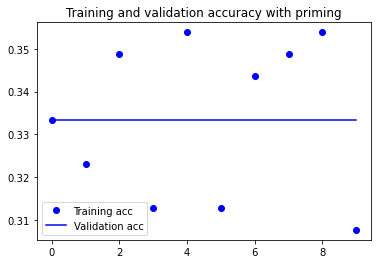

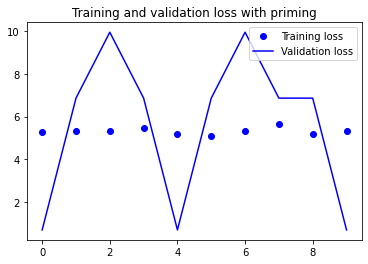

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy with priming')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss with priming')
plt.legend()

plt.show()